# Solar Power Generation Forecasting By ANN



## importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## importing dataset

In [2]:
#data_path = r'drive/My Drive/Proj/S.P.F./solarpowergeneration.csv'
dts = pd.read_csv('solarpowergeneration.csv')
dts.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [8]:
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [9]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [10]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

## Splitting Training and Test sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (3370, 20) (3370, 1) 
Test Shape: (843, 20) (843, 1)


## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [33]:
X_train

array([[-1.4184363 ,  1.27528873, -0.10450029, ..., -0.25320105,
        -0.10612333, -0.67864158],
       [-0.8006041 , -0.04871713,  1.24379474, ..., -0.4530916 ,
         0.50473097,  0.73490369],
       [-0.05013636,  1.01902953, -1.06135482, ..., -1.01923608,
        -0.27555452, -0.26907579],
       ...,
       [ 0.07683099, -0.39039606, -0.65541653, ..., -1.39690749,
        -1.06950795, -0.09670606],
       [ 0.33983479, -0.90291446,  0.60589172, ..., -0.46028235,
         0.42583997,  0.75837856],
       [-0.69517585,  0.63464073,  1.46126169, ...,  0.29366502,
         0.21371932, -0.91644165]])

In [34]:
X_test

array([[ 0.34436934, -1.37272299,  0.59139392, ..., -0.77697921,
        -0.34545677,  0.77866068],
       [-1.94104298,  1.70238739, -0.84388788, ...,  0.35000345,
         1.12786067, -0.67497983],
       [-0.95704601,  0.2929618 ,  0.98283442, ...,  0.33849845,
        -0.38020052, -1.10486388],
       ...,
       [ 0.93499425, -0.091427  , -0.36546061, ..., -0.10215079,
        -0.79634754, -0.92194781],
       [-0.09548184, -0.77478486,  0.46091376, ..., -0.95966825,
        -1.9684479 ,  0.32910788],
       [ 0.57223039, -1.11646379,  1.24379474, ..., -0.6787484 ,
        -0.66384088,  0.89032123]])

In [35]:
y_train

array([[-1.12911127],
       [-0.71307246],
       [ 0.40269241],
       ...,
       [ 1.74659266],
       [-0.5844664 ],
       [-0.14183568]])

## Creating Neural Network

### defining accuracy function

In [36]:
def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


In [37]:
spfnet = create_spfnet([32, 64], 'relu', 'normal')
spfnet.summary()

c:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(spfnet, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [39]:
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=150, verbose=2)

Epoch 1/150


106/106 - 1s - 13ms/step - loss: 0.4797 - root_mean_squared_error: 0.6926 - val_loss: 0.2515 - val_root_mean_squared_error: 0.5015
Epoch 2/150
106/106 - 0s - 2ms/step - loss: 0.2469 - root_mean_squared_error: 0.4969 - val_loss: 0.2413 - val_root_mean_squared_error: 0.4912
Epoch 3/150
106/106 - 0s - 2ms/step - loss: 0.2342 - root_mean_squared_error: 0.4839 - val_loss: 0.2391 - val_root_mean_squared_error: 0.4890
Epoch 4/150
106/106 - 0s - 2ms/step - loss: 0.2281 - root_mean_squared_error: 0.4776 - val_loss: 0.2431 - val_root_mean_squared_error: 0.4931
Epoch 5/150
106/106 - 0s - 2ms/step - loss: 0.2259 - root_mean_squared_error: 0.4753 - val_loss: 0.2487 - val_root_mean_squared_error: 0.4987
Epoch 6/150
106/106 - 0s - 2ms/step - loss: 0.2232 - root_mean_squared_error: 0.4724 - val_loss: 0.2306 - val_root_mean_squared_error: 0.4802
Epoch 7/150
106/106 - 0s - 2ms/step - loss: 0.2170 - root_mean_squared_error: 0.4658 - val_loss: 0.2386 - val_root_mean_squared_error: 0.4884
Epoch 8/150
106/1

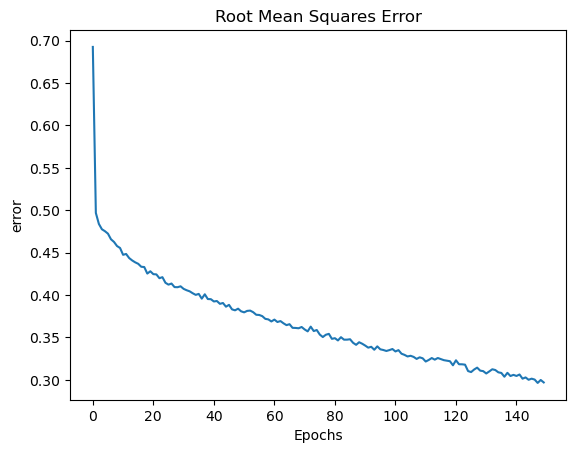

In [40]:

plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [41]:
spfnet.evaluate(X_train, y_train)

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0792 - root_mean_squared_error: 0.2814


[0.07854463160037994, 0.2802581489086151]

In [42]:
from sklearn.metrics import mean_squared_error

y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


437.50443849046525

In [43]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


c:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


261.56417041194186

In [44]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7678367592072817

In [45]:
r2_score(train_pred_orig, y_train_orig)

0.911643633457136

In [46]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[ 292.05413818,   82.954039  ],
       [ 551.65332031,  471.24194   ],
       [1151.77392578, 1512.5823    ],
       ...,
       [2014.46972656, 2766.8408    ],
       [ 529.91375732,  591.26963   ],
       [1255.35351562, 1004.3757    ]])

In [47]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2050.10766602, 2511.2375    ],
       [  28.90009117,  480.20512   ],
       [1855.69238281, 2017.5687    ],
       ...,
       [2123.13769531, 2171.7997    ],
       [2607.47998047, 2720.9167    ],
       [1988.32531738, 2119.1084    ]])

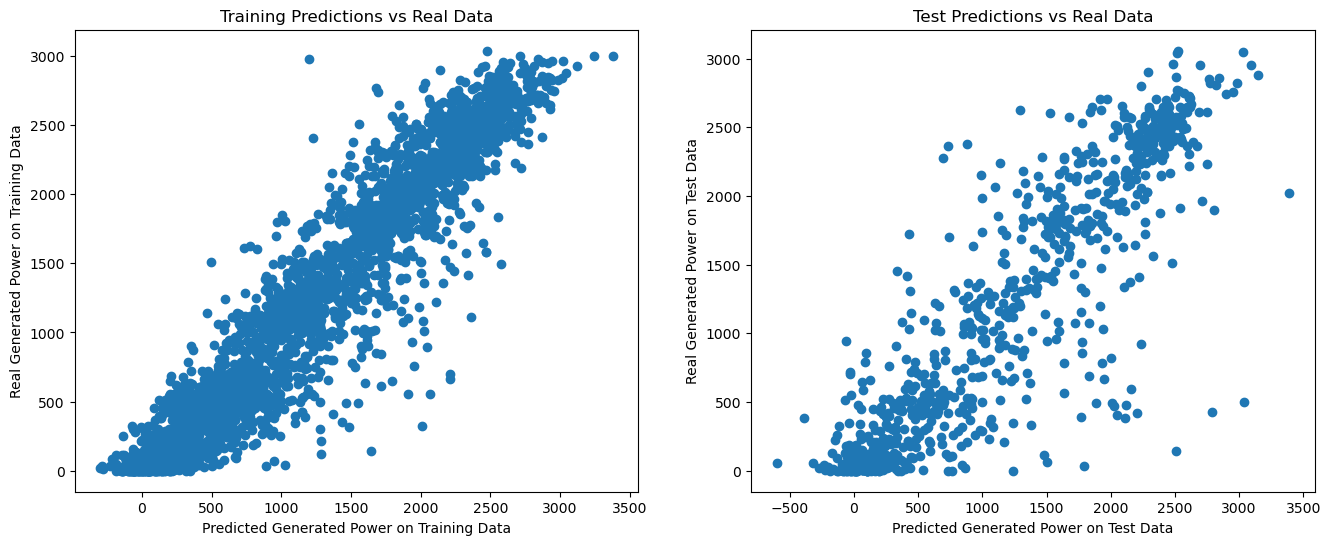

In [48]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

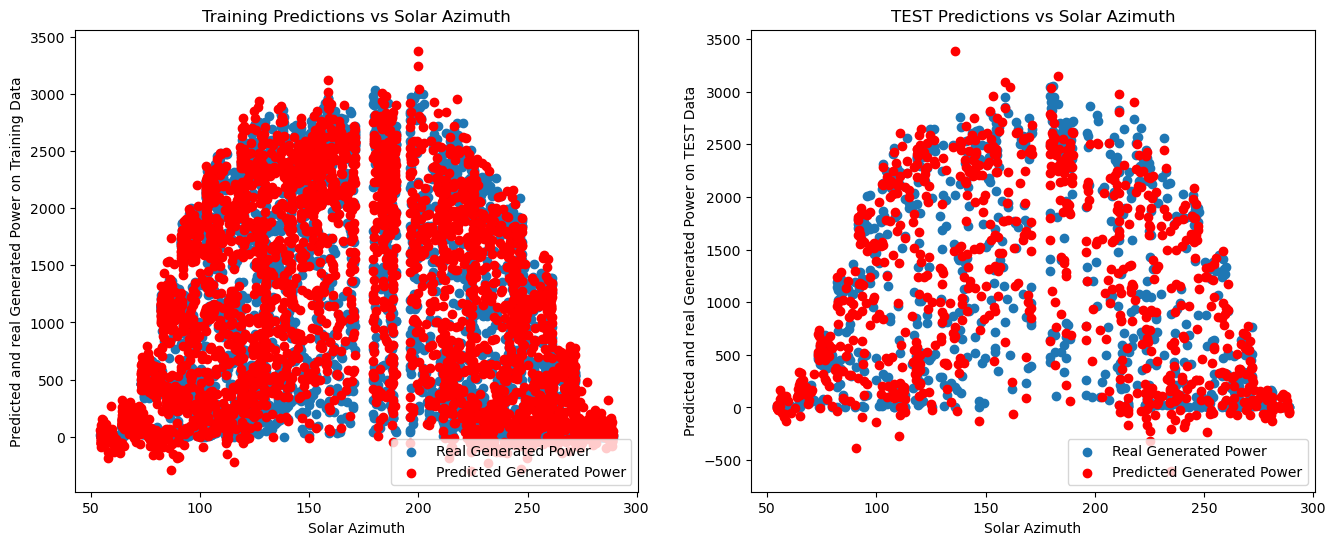

In [49]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

In [50]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data=results)
results.columns = ['Real Solar Power Produced', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[7:18]

,Real Solar Power Produced,Predicted Solar Power
7,"2,497.53","2,454.56"
8,514.65,455.37
9,916.92,"1,177.21"
10,"1,911.95","1,804.33"
11,35.15,-69.72
12,"2,449.04","2,330.84"
13,38.84,843.54
14,823.41,"2,002.55"
15,"2,274.65","2,176.82"
16,"1,123.40",973.87


In [51]:
sc = StandardScaler()
pred_whole = spfnet.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


array([[ 627.8749  ],
       [1284.7084  ],
       [2105.9302  ],
       ...,
       [ 137.79395 ],
       [  61.755806],
       [ 228.96863 ]], dtype=float32)

In [52]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [53]:
r2_score(pred_whole_orig, y)

0.8800318807922256

In [54]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Whole Data Frame,0.880032
R2 Score of Training Set,0.911644
R2 Score of Test Set,0.767837
Mean of Test Set,1134.467407
Standard Deviation pf Test Set,907.999756
Relative Standard Deviation,0.800375


In [55]:
corr = data.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

NameError: name 'data' is not defined

**OBSERVATIONS**
- High Correlation between Zenith and Agnle of Incidence of 0.71
- Shortwave radiation backwards and Generate Power KW has corr of 0.56
- Relative Humidity and Zenith are +ve corr (0.51)
- Relative Humidity and Low Cloud Cover are + ve correlated (0.49)
- Angle of Incidence and Zenith are -vely correlated with Genarted Power (-0.65)
- -ve corr between Zenith and temperature of -0.55
- High negative corr exists btw Shortwave radiation backwards and Zenith (-.8)
- Shortwave radiation backwards and Relative humidity are -vely correlated (-.72)
- Relative humidity and Temperature are -vely correlated (-.77)
- 


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=data.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.38
mean_sea_level_pressure_MSL,0.12
wind_speed_80_m_above_gnd,0.07
wind_speed_10_m_above_gnd,0.02
snowfall_amount_sfc,0.02
wind_direction_80_m_above_gnd,0.01
wind_direction_10_m_above_gnd,0.01
wind_direction_900_mb,-0.00
total_precipitation_sfc,-0.00
wind_gust_10_m_above_gnd,-0.03


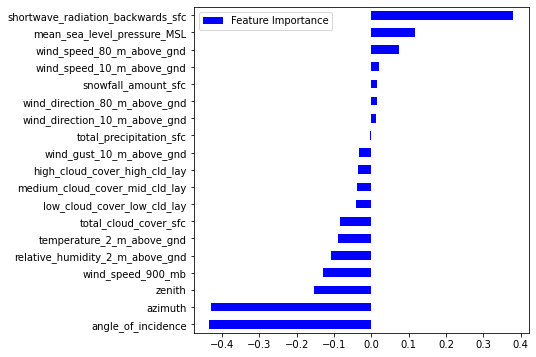

In [ ]:
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')